In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [54]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.shape

(768, 9)

In [55]:
split_count = int(df.shape[0]*.8)
split_count

614

In [56]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [57]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [58]:
feature_names = train.columns[:-1].tolist()

In [59]:
label_name = train.columns[-1]
label_name

'Outcome'

In [60]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [61]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [62]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [63]:
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [64]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

In [65]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

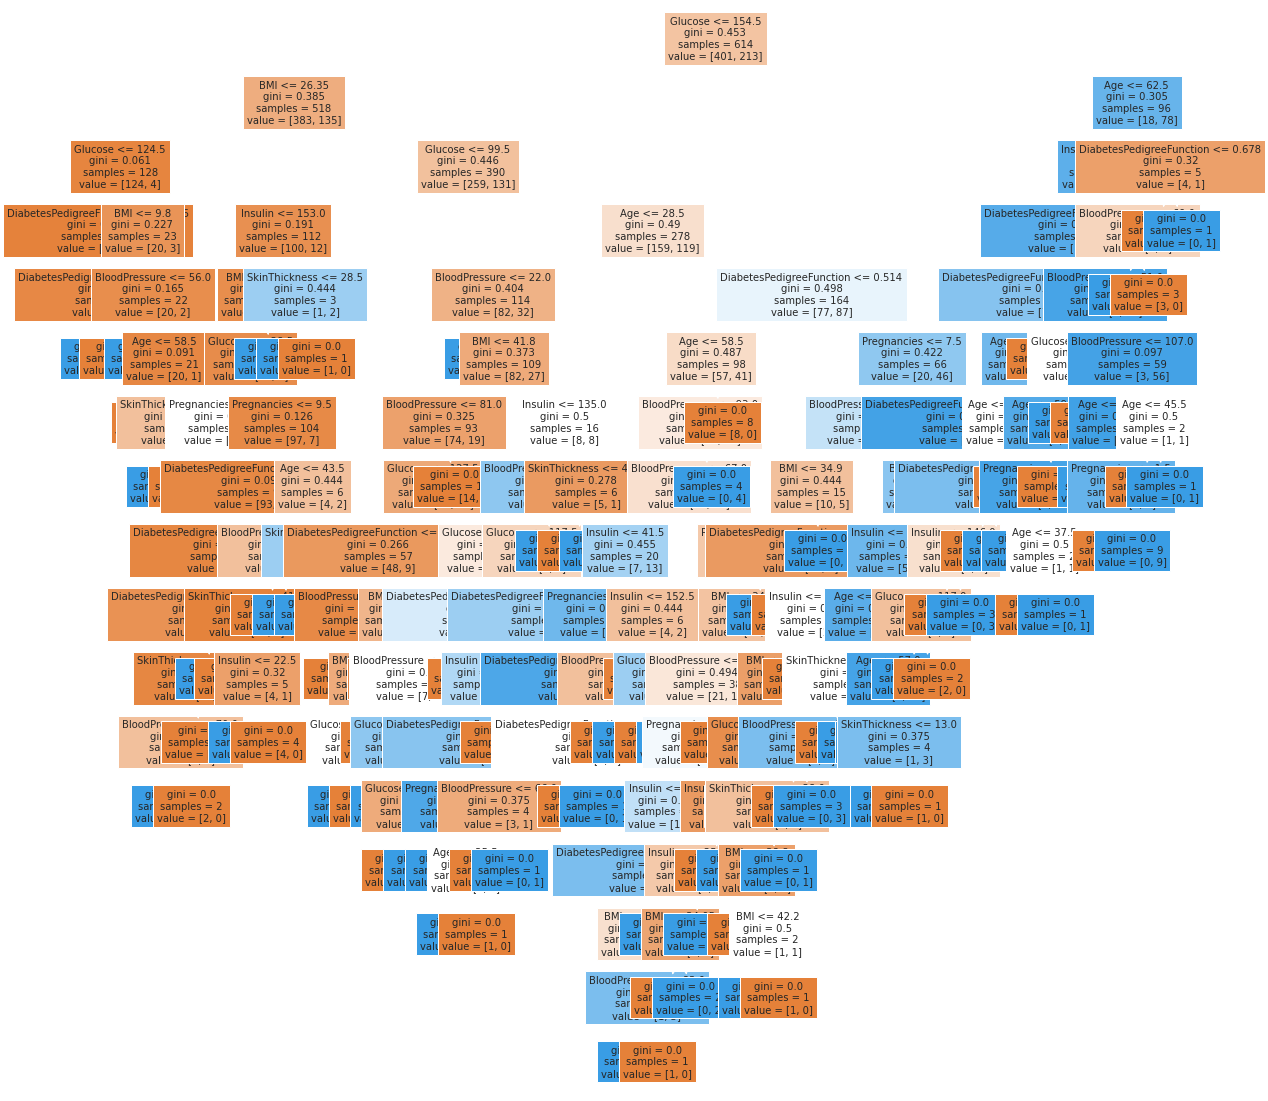

In [67]:
from sklearn.tree import plot_tree

plt.figure( figsize=(20,20) )
tree = plot_tree(model, feature_names=feature_names,
                filled=True, fontsize=10)

In [68]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                           feature_names = feature_names,
#                           filled=True)
# graphviz.Source(dot_tree)

In [69]:
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

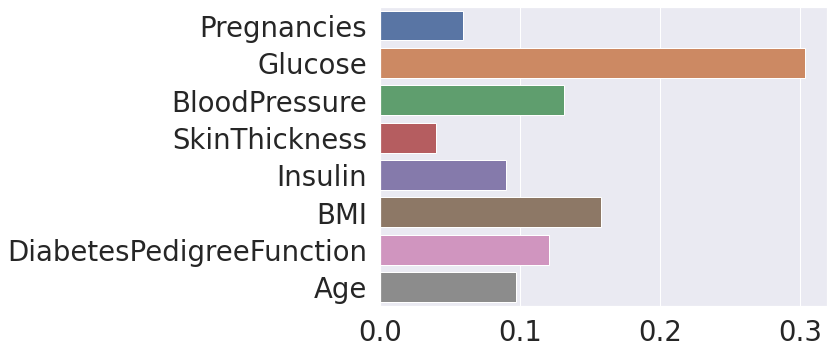

In [70]:
sns.barplot(x = model.feature_importances_, y = feature_names)

In [79]:
(y_test == y_predict).sum() / len(y_test) *100

71.42857142857143

In [85]:
from sklearn.metrics import accuracy_score

print(f'{accuracy_score(y_test, y_predict)*100}%')
print( f'{model.score(X_test, y_test)*100}%' )

71.42857142857143%
0.7142857142857143%
